### Cleaning bike lane data for map
##### Keep only relevant data like names, location data etc.
##### Change the CRS to the same one as the base map in QGIS

In [3]:
import warnings, os
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline

In [8]:
# Load bike lane data file
bikelanes = gpd.read_file("../Raw Data/New York City Bike Routes_20250629.geojson")

<Axes: >

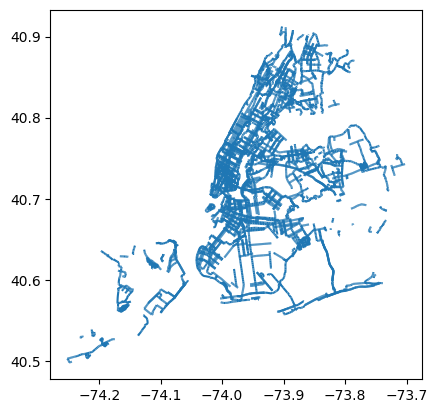

In [9]:
bikelanes.plot()

In [10]:
bikelanes.head()

,bikedir,fromstreet,lanecount,facilitycl,ft2facilit,tf2facilit,tostreet,ret_date,bikeid,instdate,...,allclasses,version,onoffst,status,ft_facilit,boro,street,segmentid,prevbikeid,geometry
0,2,HOLTEN AV,2,II,None,None,LUTEN AV,NaT,6562.0,2007-10-01,...,II,23c,ON,Current,Curbside,5,HYLAN BLVD,2579.0,NA,"MULTILINESTRING ((-74.19243 40.52174, -74.1951..."
1,2,RICHMOND HILL RD,2,II,None,None,ROCKLAND AV,NaT,4272.0,2021-08-12,...,II,23c,ON,Current,Buffered,5,MERRYMOUNT ST,5033.0,None,"MULTILINESTRING ((-74.16031 40.58903, -74.1612..."
2,2,RICHMOND TERR,2,III,None,None,FOREST AVE,NaT,2107.0,2015-09-11,...,III,23c,ON,Current,Sharrows,5,CLOVE ROAD,10186.0,NA,"MULTILINESTRING ((-74.12632 40.63525, -74.1259..."
3,2,23 ST,2,III,None,None,50 ST,NaT,942.0,2013-07-02,...,III,23c,ON,Current,Sharrows,3,5 AV,20716.0,NA,"MULTILINESTRING ((-74.00974 40.64567, -74.0103..."
4,2,67 ST,2,III,None,None,FT HAMILTON PKWY,NaT,951.0,2015-06-29,...,III,23c,ON,Current,Sharrows,3,6 AVENUE,126857.0,NA,"MULTILINESTRING ((-74.02089 40.62654, -74.0209..."


In [11]:
len(bikelanes)

27673

In [12]:
bikelanes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
bikelanes = bikelanes.to_crs("epsg:3857")

In [15]:
trimmed_bikelanes = bikelanes.drop(columns=["ft2facilit", "tf2facilit", "prevbikeid", "ret_date"])

In [16]:
os.makedirs('../Clean Data', exist_ok=True)
trimmed_bikelanes.to_file("trimmed_bikelanes.geojson", driver="GeoJSON")